In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img



train=ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         rescale=1./255,
                         horizontal_flip=True,
                         fill_mode='nearest')

train_set=train.flow_from_directory('/kaggle/input/nanaagx/chips classification/train_set',
                                    target_size=(224,224)
                                    ,batch_size=32,
                                    class_mode='categorical')

test=ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         rescale=1./255,
                         horizontal_flip=True,
                         fill_mode='nearest')

test_set = test.flow_from_directory('/kaggle/input/nanaagx/chips classification/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')




Found 344 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [7]:
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix

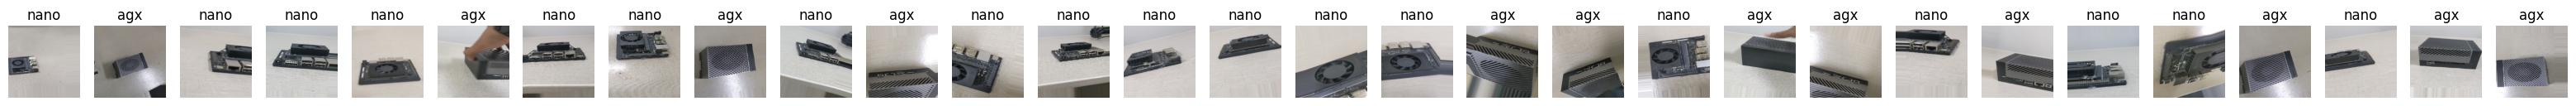

In [8]:
import matplotlib.pyplot as plt
import random




# Function to display random images with labels
def display_random_images(generator, num_images):
    class_names = list(generator.class_indices.keys())
    
    # Get a batch of images and labels
    images, labels = next(generator)
    
    # Select random indices
    indices = np.random.choice(images.shape[0], num_images, replace=False)
    
    plt.figure(figsize=(40, 40))
    
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx])
        plt.title(class_names[np.argmax(labels[idx])])
        plt.axis('off')
    
    plt.show()

# Display random images from the training set
display_random_images(train_set, 30)

In [9]:
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation='relu', input_shape=[224, 224, 3],kernel_regularizer=tf.keras.regularizers.l2(0.01)))  
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.5))


cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))


optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history=cnn.fit(x=train_set,validation_data=test_set, epochs=25)


Epoch 1/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5078 - loss: 2.0240 

W0000 00:00:1720642143.495049     187 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5096 - loss: 2.0563

W0000 00:00:1720642151.349577     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 889ms/step - accuracy: 0.5091 - loss: 2.0574 - val_accuracy: 0.5119 - val_loss: 1.9762
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 445ms/step - accuracy: 0.5216 - loss: 2.0043 - val_accuracy: 0.6190 - val_loss: 1.9441
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 426ms/step - accuracy: 0.5311 - loss: 1.9360 - val_accuracy: 0.7500 - val_loss: 1.8993
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - accuracy: 0.5910 - loss: 1.9004 - val_accuracy: 0.7143 - val_loss: 1.8720
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - accuracy: 0.6142 - loss: 1.8524 - val_accuracy: 0.5000 - val_loss: 1.8405
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.5852 - loss: 1.8457 - val_accuracy: 0.6310 - val_loss: 1.8072
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.5970 - loss: 1.7916 - val_accuracy: 0.6548 - val_loss: 1.7632
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 415ms/step - accuracy: 0.6542 - loss: 1.7616 - val_accuracy: 0.7500

In [28]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam



base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions = Dense(2,activation='sigmoid')(x)

modelres=Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable=False
    
modelres.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy", metrics =['accuracy'])


modelres.fit(train_set,validation_data=test_set, epochs=10, verbose=1)

# Unfreeze some layers and fine-tune
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
modelres.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
modelres.fit(train_set,validation_data=test_set, epochs=10, verbose=1)


Epoch 1/10
 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.6172 - loss: 0.7157

W0000 00:00:1720644702.338007     189 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 5/11 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5704 - loss: 0.7258  

W0000 00:00:1720644706.289657     187 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.5563 - loss: 0.7242

W0000 00:00:1720644712.595004     187 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5535 - loss: 0.7247 - val_accuracy: 0.5000 - val_loss: 0.6821
Epoch 2/10


W0000 00:00:1720644714.754695     187 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 442ms/step - accuracy: 0.5517 - loss: 0.6869 - val_accuracy: 0.5000 - val_loss: 0.6764
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 445ms/step - accuracy: 0.5281 - loss: 0.6801 - val_accuracy: 0.7024 - val_loss: 0.6609
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.6753 - loss: 0.6591 - val_accuracy: 0.6190 - val_loss: 0.6626
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.5519 - loss: 0.6603 - val_accuracy: 0.6190 - val_loss: 0.6507
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 451ms/step - accuracy: 0.6187 - loss: 0.6590 - val_accuracy: 0.6310 - val_loss: 0.6464
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - accuracy: 0.5877 - loss: 0.6498 - val_accuracy: 0.5000 - val_loss: 0.6669
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 450ms/step - accuracy: 0.6006 - loss: 0.6524 - val_accuracy: 0.7381 - val_loss: 0.6360
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 442ms/step - accuracy: 0.7159 - loss: 0.6241 - val_accuracy: 0.690

W0000 00:00:1720644830.106734     189 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 950ms/step - accuracy: 0.5522 - loss: 0.8329

W0000 00:00:1720644838.688135     190 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.5583 - loss: 0.8186

W0000 00:00:1720644844.716168     190 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5634 - loss: 0.8066 - val_accuracy: 0.6310 - val_loss: 0.6267
Epoch 2/10


W0000 00:00:1720644846.884343     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 463ms/step - accuracy: 0.7483 - loss: 0.5147 - val_accuracy: 0.7500 - val_loss: 0.6078
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - accuracy: 0.7958 - loss: 0.4326 - val_accuracy: 0.6548 - val_loss: 0.6211
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.8746 - loss: 0.2935 - val_accuracy: 0.6310 - val_loss: 0.6279
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - accuracy: 0.8614 - loss: 0.2898 - val_accuracy: 0.6310 - val_loss: 0.6110
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 451ms/step - accuracy: 0.9095 - loss: 0.2387 - val_accuracy: 0.6310 - val_loss: 0.6285
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 508ms/step - accuracy: 0.9138 - loss: 0.1825 - val_accuracy: 0.6548 - val_loss: 0.6296
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 466ms/step - accuracy: 0.9528 - loss: 0.1509 - val_accuracy: 0.5595 - val_loss: 0.6680
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 470ms/step - accuracy: 0.9473 - loss: 0.1370 - val_accuracy: 0.595

In [23]:
predictions = cnn.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_set.classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 713ms/step


In [29]:
predictionsres = modelres.predict(test_set)
predicted_classesres = np.argmax(predictionsres, axis=1)

true_classes = test_set.classes

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

W0000 00:00:1720645016.722778     187 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step 


W0000 00:00:1720645020.772499     187 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [13]:
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f'F1 Score: {f1}')


F1 Score: 0.4874414644529588


In [30]:
f1res = f1_score(true_classes, predicted_classesres, average='weighted')
print(f'resnet F1 Score: {f1res}')


resnet F1 Score: 0.31147540983606553


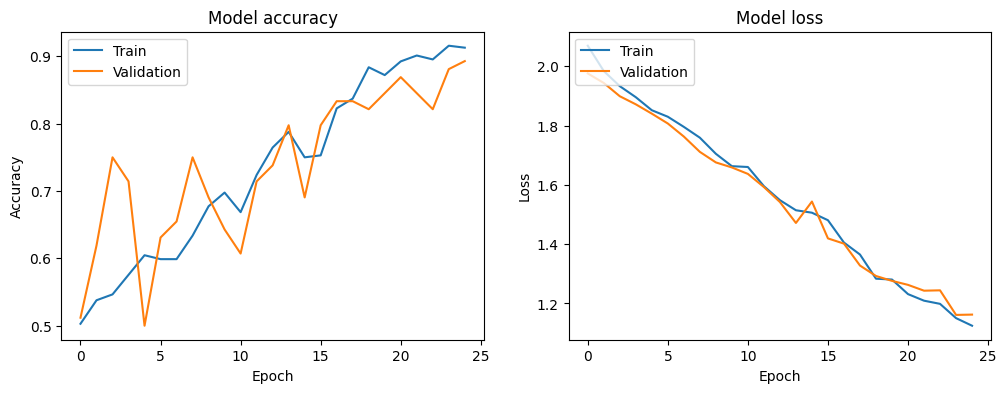

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

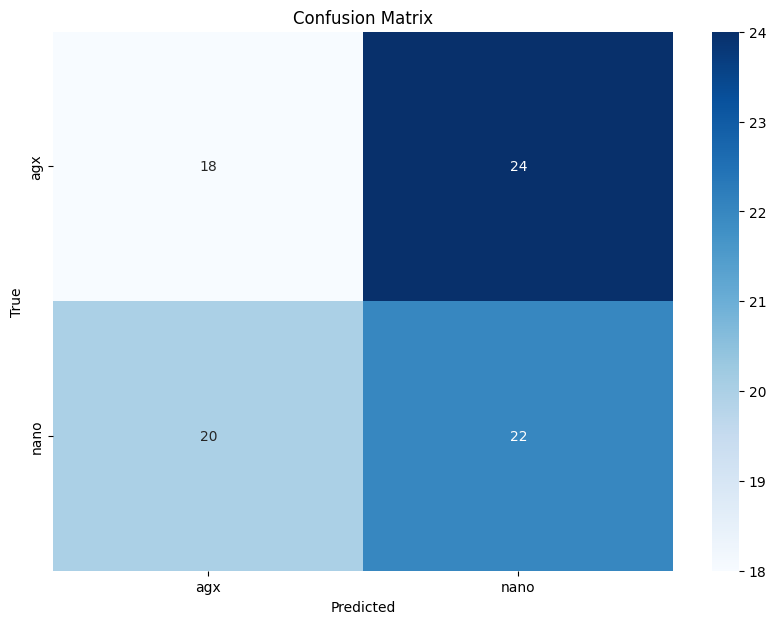

In [24]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

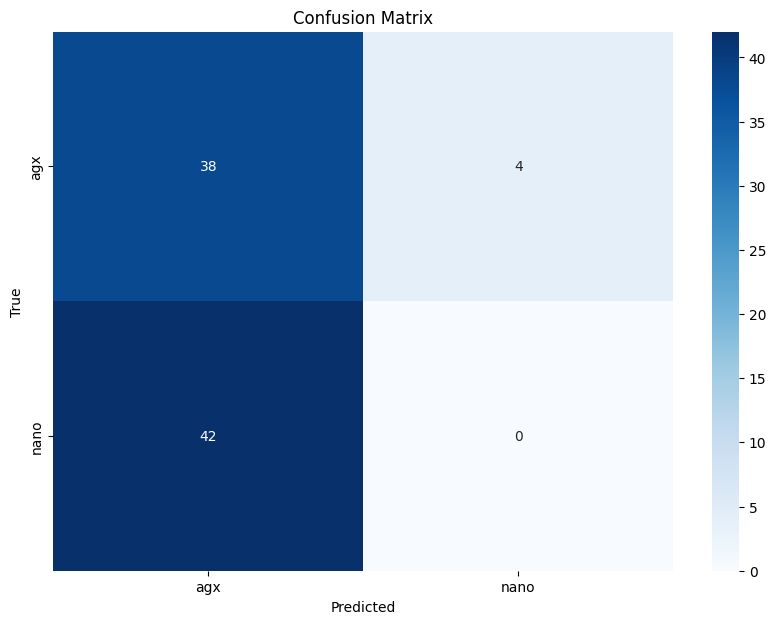

In [31]:
conf_matrix = confusion_matrix(true_classes, predicted_classesres)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
resnet50_scores = modelres.evaluate(test_set)
print("ResNet50 Accuracy: {:.2f}%".format(resnet50_scores[1] * 100))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 532ms/step - accuracy: 0.6021 - loss: 0.6883
ResNet50 Accuracy: 57.14%


In [33]:
scores = cnn.evaluate(test_set)
print("model Accuracy: {:.2f}%".format(scores[1] * 100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 588ms/step - accuracy: 0.9330 - loss: 1.1366
model Accuracy: 92.86%
